In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import hickle
from tqdm import tqdm

In [2]:
# plotting style
import matplotlib as mpl
from matplotlib import rc
mpl.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size':30})
rc('text', usetex=True)

mpl.rc('xtick', labelsize=25) 
mpl.rc('ytick', labelsize=25)
mpl.rc('xtick', labelsize=25) 
mpl.rc('ytick', labelsize=25)

mpl.rcParams['xtick.major.size'] = 6.0
mpl.rcParams['xtick.major.width'] = 2.5
mpl.rcParams['ytick.major.size'] = 6.0
mpl.rcParams['ytick.major.width'] = 2.5

mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['patch.linewidth'] = 2.0
mpl.rcParams['xtick.major.pad'] = 14.0
mpl.rcParams['ytick.major.pad'] = 14.0

mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False

mpl.rcParams['xtick.minor.size'] = 4.5
mpl.rcParams['xtick.minor.width'] = 1.25
mpl.rcParams['ytick.minor.size'] = 4.5
mpl.rcParams['ytick.minor.width'] = 1.25

import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

# Load data

In [3]:
true_fractions, _ = hickle.load('data/true_classification_fractions.hkl')
mass_baseline_fractions = hickle.load('data/mass_baseline_classifier_preds.hkl')
L_baseline_fractions = hickle.load('data/L_baseline_classifier_preds.hkl')
spacing_baseline_fractions = hickle.load('data/spacing_baseline_classifier_preds.hkl')

# Calculate summary statistics

In [4]:
baseline_residuals1 = true_fractions[:,0] - mass_baseline_fractions[:,0]
baseline_residuals2 = true_fractions[:,1] - mass_baseline_fractions[:,1]
baseline_residuals3 = true_fractions[:,2] - mass_baseline_fractions[:,2]

In [5]:
baseline_sigma1 = np.std(baseline_residuals1)
baseline_sigma2 = np.std(baseline_residuals2)
baseline_sigma3 = np.std(baseline_residuals3)
baseline_sigma1, baseline_sigma2, baseline_sigma3

(0.2916951285549587, 0.27034796580230164, 0.1453576544205544)

In [6]:
baseline_bias1 = np.mean(baseline_residuals1)
baseline_bias2 = np.mean(baseline_residuals2)
baseline_bias3 = np.mean(baseline_residuals3)
baseline_bias1, baseline_bias2, baseline_bias3

(0.02622181359098617, -0.0019137933279129154, -0.02430802026307326)

In [7]:
baseline_residuals1 = true_fractions[:,0] - L_baseline_fractions[:,0]
baseline_residuals2 = true_fractions[:,1] - L_baseline_fractions[:,1]
baseline_residuals3 = true_fractions[:,2] - L_baseline_fractions[:,2]

In [8]:
baseline_sigma1 = np.std(baseline_residuals1)
baseline_sigma2 = np.std(baseline_residuals2)
baseline_sigma3 = np.std(baseline_residuals3)
baseline_sigma1, baseline_sigma2, baseline_sigma3

(0.2932683601121315, 0.2908340332415371, 0.17695994904849116)

In [9]:
baseline_bias1 = np.mean(baseline_residuals1)
baseline_bias2 = np.mean(baseline_residuals2)
baseline_bias3 = np.mean(baseline_residuals3)
baseline_bias1, baseline_bias2, baseline_bias3

(0.02061297228962324, -0.05469586351834801, 0.03408289122872477)

In [10]:
baseline_residuals1 = true_fractions[:,0] - spacing_baseline_fractions[:,0]
baseline_residuals2 = true_fractions[:,1] - spacing_baseline_fractions[:,1]
baseline_residuals3 = true_fractions[:,2] - spacing_baseline_fractions[:,2]

In [11]:
baseline_sigma1 = np.std(baseline_residuals1)
baseline_sigma2 = np.std(baseline_residuals2)
baseline_sigma3 = np.std(baseline_residuals3)
baseline_sigma1, baseline_sigma2, baseline_sigma3

(0.3236105632120641, 0.2875474839068092, 0.22071993179651736)

In [12]:
baseline_bias1 = np.mean(baseline_residuals1)
baseline_bias2 = np.mean(baseline_residuals2)
baseline_bias3 = np.mean(baseline_residuals3)
baseline_bias1, baseline_bias2, baseline_bias3

(-0.02406511648938874, 0.0388876235777409, -0.014822507088352166)

#  Make nine panel scatterplot

In [13]:
# function to get points that are in the upper left portion of the plot (used to make them transparent)
def separate_data(x_arr, y_arr, x_cutoff=0.31, y_cutoff=0.70):
    good_x, bad_x = [], []
    good_y, bad_y = [], []
    for i in range(len(x_arr)):
        if x_arr[i] < x_cutoff and y_cutoff < y_arr[i]:
            bad_x.append(x_arr[i])
            bad_y.append(y_arr[i])
        else:
            good_x.append(x_arr[i])
            good_y.append(y_arr[i])
            
    return np.array(good_x), np.array(good_y), np.array(bad_x), np.array(bad_y)

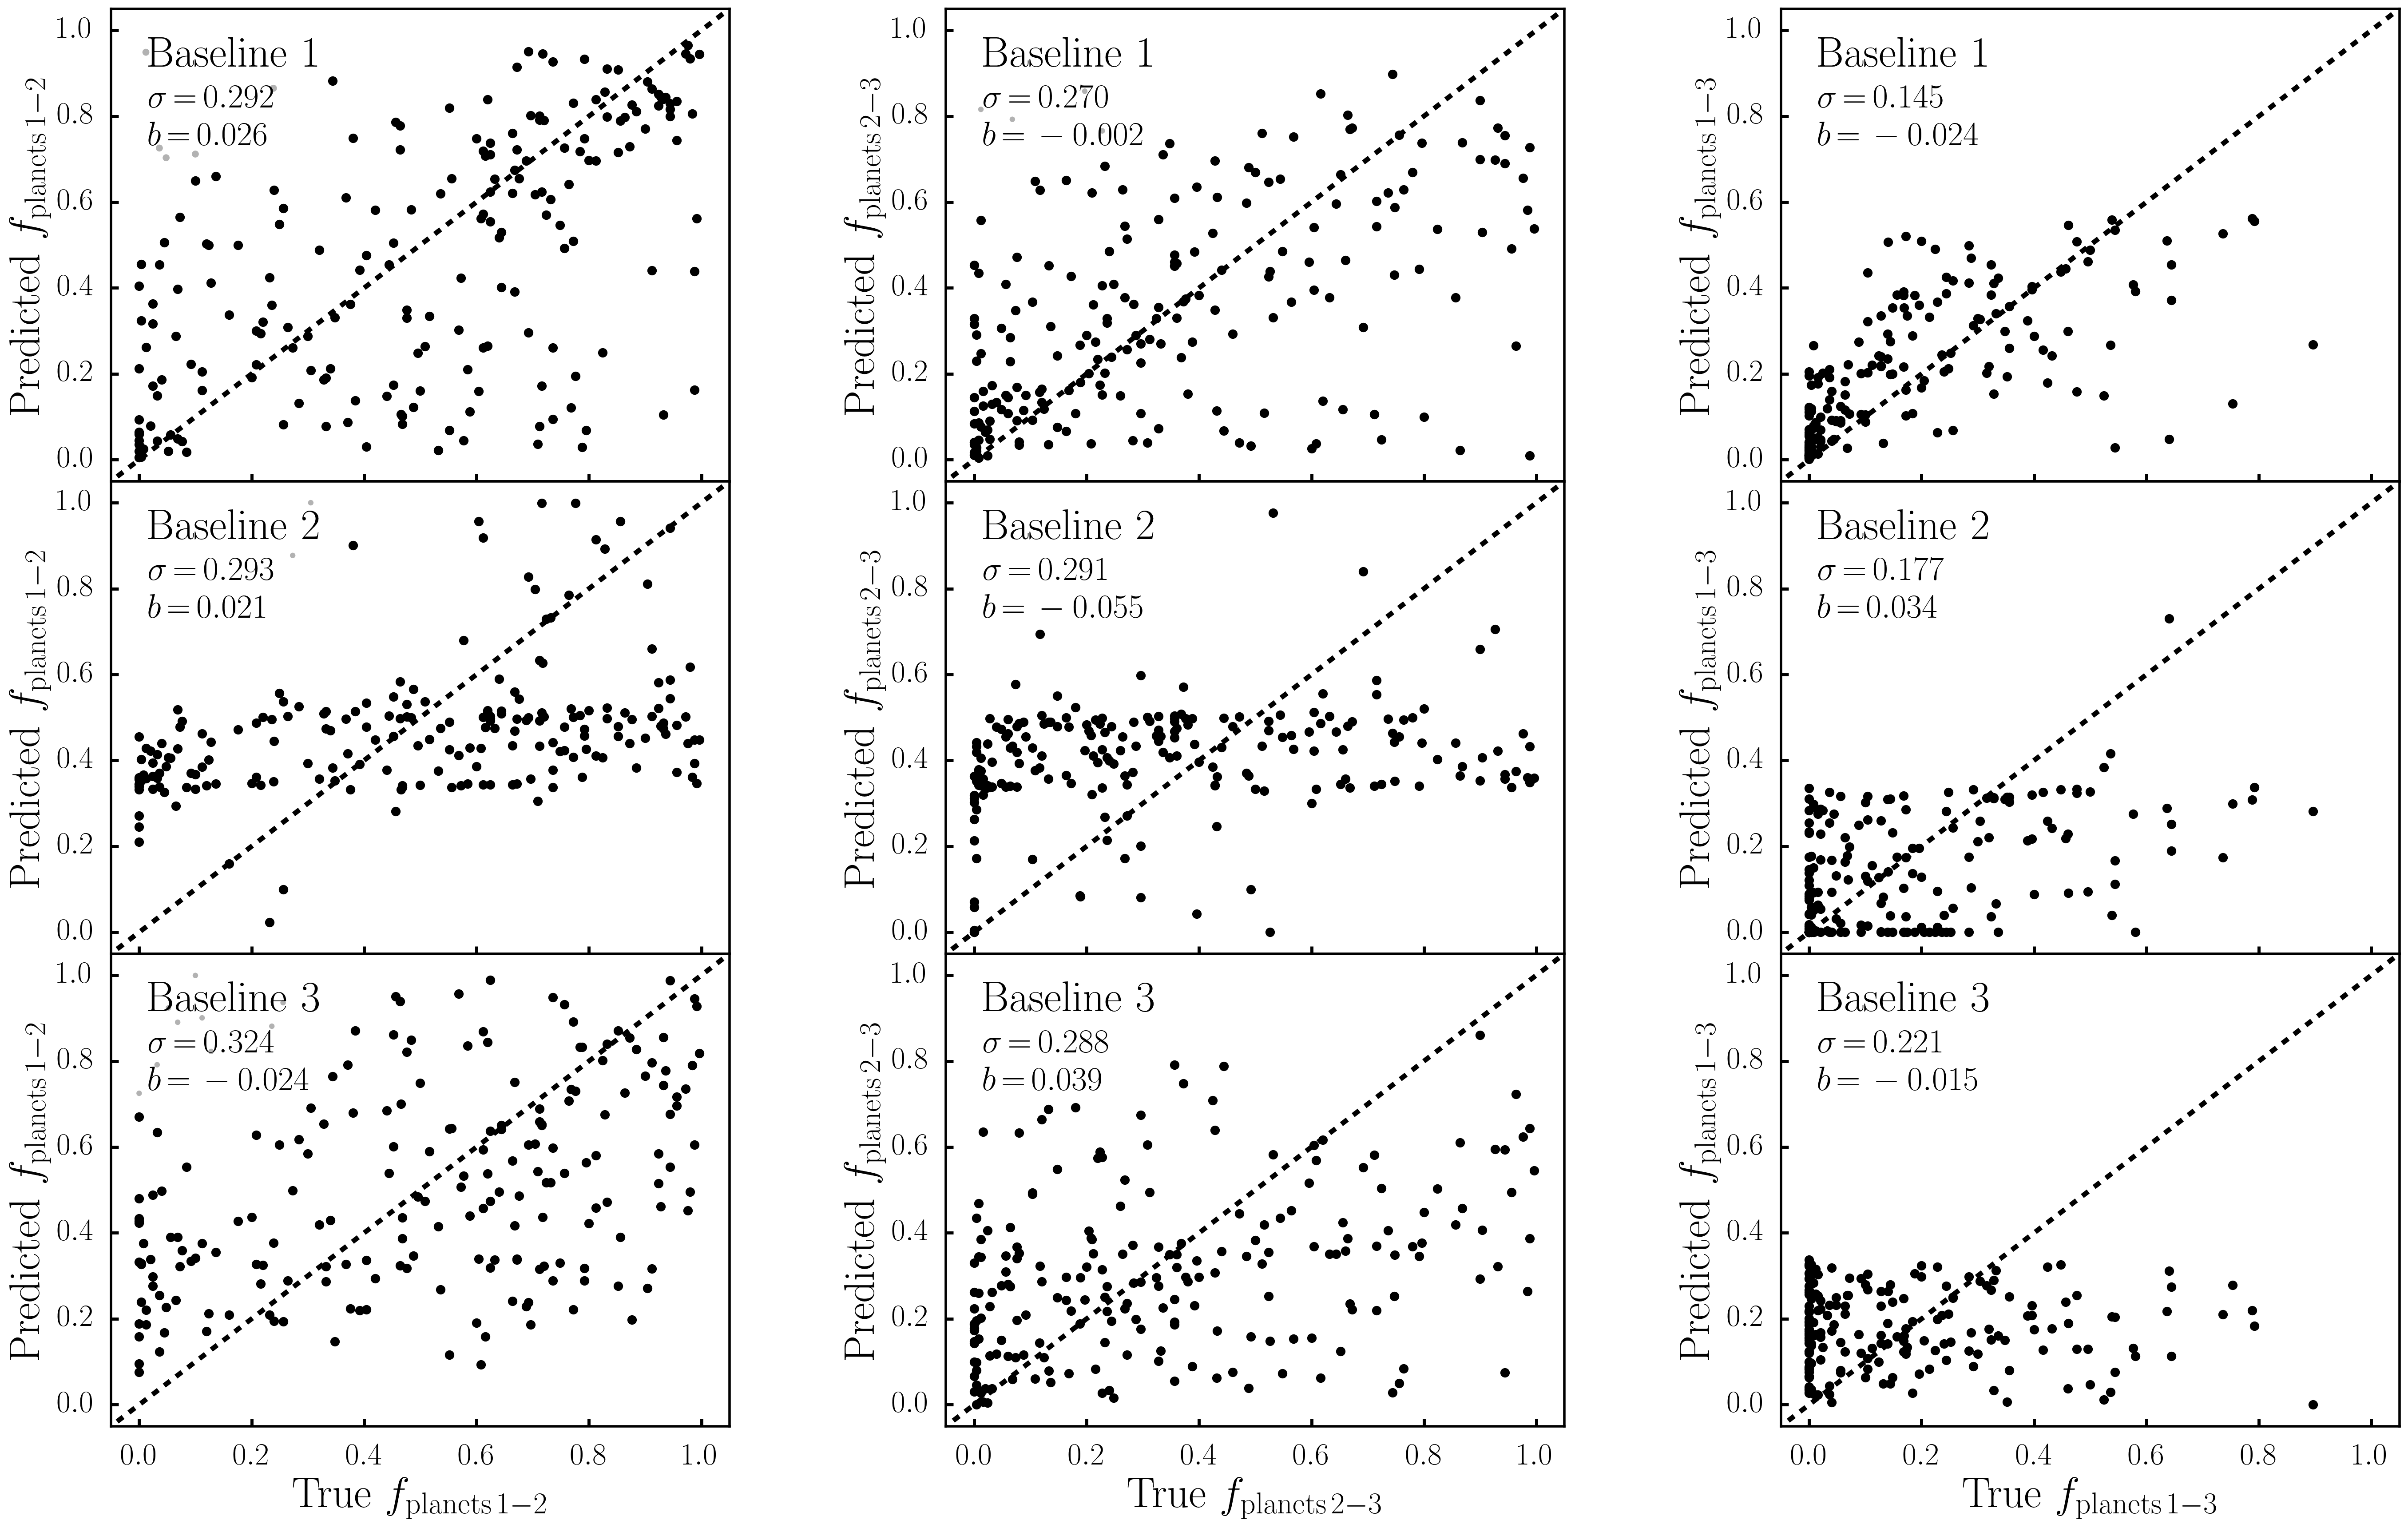

In [14]:
# plot parameters
c = 0.06
c2 = 0.1
c3 = 0.08

# setup axes
fig, ax = plt.subplots(3, 3, figsize=(33.25,19.95), facecolor='white', sharex='col', dpi=200)

good_x, good_y, bad_x, bad_y = separate_data(true_fractions[:,0], mass_baseline_fractions[:,0])
ax[0,0].scatter(good_x, good_y, color='k', s=32, alpha=1.0)
ax[0,0].scatter(bad_x, bad_y, color='k', s=32, edgecolor='none', alpha=0.30)
ax[0,0].plot(np.linspace(-0.5, 1.5), np.linspace(-0.5, 1.5), c='k', lw=4, ls='--', label=r'$y\,{=}\,x$')
ax[0,0].set_ylabel(r'Predicted $f_{\mathrm{planets}\,1-2}$', fontsize=35, labelpad=5)
ax[0,0].set_xlim([-0.05, 1.05])
ax[0,0].set_ylim([-0.05, 1.05])
ax[0,0].text(-0.05+c*1.10, 1.05-c*1.10, r'Baseline 1', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[0,0].text(-0.05+c*1.10, 1.05-(c+c2)*1.10, r'$\sigma\,{=}\,0.292$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[0,0].text(-0.05+c*1.10, 1.05-(c+c2+c3)*1.10, r'$b\,{=}\,0.026$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

good_x, good_y, bad_x, bad_y = separate_data(true_fractions[:,1], mass_baseline_fractions[:,1])
ax[0,1].scatter(good_x, good_y, color='k', s=32, alpha=1.0)
ax[0,1].scatter(bad_x, bad_y, color='k', edgecolor='none', alpha=0.30)
ax[0,1].plot(np.linspace(-0.5, 1.5), np.linspace(-0.5, 1.5), c='k', lw=4, ls='--', label=r'$y\,{=}\,x$')
ax[0,1].set_ylabel(r'Predicted $f_{\mathrm{planets}\,2-3}$', fontsize=35, labelpad=5)
ax[0,1].set_xlim([-0.05, 1.05])
ax[0,1].set_ylim([-0.05, 1.05])
ax[0,1].text(-0.05+c*1.10, 1.05-c*1.10, r'Baseline 1', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[0,1].text(-0.05+c*1.10, 1.05-(c+c2)*1.10, r'$\sigma\,{=}\,0.270$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[0,1].text(-0.05+c*1.10, 1.05-(c+c2+c3)*1.10, r'$b\,{=}\,-0.002$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

good_x, good_y, bad_x, bad_y = separate_data(true_fractions[:,2], mass_baseline_fractions[:,2])
ax[0,2].scatter(good_x, good_y, color='k', s=32, alpha=1.0)
ax[0,2].scatter(bad_x, bad_y, color='k', edgecolor='none', alpha=0.30)
ax[0,2].plot(np.linspace(-0.5, 1.5), np.linspace(-0.5, 1.5), c='k', lw=4, ls='--', label=r'$y\,{=}\,x$')
ax[0,2].set_ylabel(r'Predicted $f_{\mathrm{planets}\,1-3}$', fontsize=35, labelpad=5)
ax[0,2].set_xlim([-0.05, 1.05])
ax[0,2].set_ylim([-0.05, 1.05])
ax[0,2].text(-0.05+c*1.10, 1.05-c*1.10, r'Baseline 1', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[0,2].text(-0.05+c*1.10, 1.05-(c+c2)*1.10, r'$\sigma\,{=}\,0.145$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[0,2].text(-0.05+c*1.10, 1.05-(c+c2+c3)*1.10, r'$b\,{=}\,-0.024$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

good_x, good_y, bad_x, bad_y = separate_data(true_fractions[:,0], L_baseline_fractions[:,0])
ax[1,0].scatter(good_x, good_y, color='k', s=32, alpha=1.0)
ax[1,0].scatter(bad_x, bad_y, color='k', edgecolor='none', alpha=0.30)
ax[1,0].plot(np.linspace(-0.5, 1.5), np.linspace(-0.5, 1.5), c='k', lw=4, ls='--', label=r'$y\,{=}\,x$')
ax[1,0].set_ylabel(r'Predicted $f_{\mathrm{planets}\,1-2}$', fontsize=35, labelpad=5)
ax[1,0].set_xlim([-0.05, 1.05])
ax[1,0].set_ylim([-0.05, 1.05])
ax[1,0].text(-0.05+c*1.10, 1.05-c*1.10, r'Baseline 2', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[1,0].text(-0.05+c*1.10, 1.05-(c+c2)*1.10, r'$\sigma\,{=}\,0.293$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[1,0].text(-0.05+c*1.10, 1.05-(c+c2+c3)*1.10, r'$b\,{=}\,0.021$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

good_x, good_y, bad_x, bad_y = separate_data(true_fractions[:,1], L_baseline_fractions[:,1])
ax[1,1].scatter(good_x, good_y, color='k', s=32, alpha=1.0)
ax[1,1].scatter(bad_x, bad_y, color='k', edgecolor='none', alpha=0.30)
ax[1,1].plot(np.linspace(-0.5, 1.5), np.linspace(-0.5, 1.5), c='k', lw=4, ls='--', label=r'$y\,{=}\,x$')
ax[1,1].set_ylabel(r'Predicted $f_{\mathrm{planets}\,2-3}$', fontsize=35, labelpad=5)
ax[1,1].set_xlim([-0.05, 1.05])
ax[1,1].set_ylim([-0.05, 1.05])
ax[1,1].text(-0.05+c*1.10, 1.05-c*1.10, r'Baseline 2', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[1,1].text(-0.05+c*1.10, 1.05-(c+c2)*1.10, r'$\sigma\,{=}\,0.291$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[1,1].text(-0.05+c*1.10, 1.05-(c+c2+c3)*1.10, r'$b\,{=}\,-0.055$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

good_x, good_y, bad_x, bad_y = separate_data(true_fractions[:,2], L_baseline_fractions[:,2])
ax[1,2].scatter(good_x, good_y, color='k', s=32, alpha=1.0)
ax[1,2].scatter(bad_x, bad_y, color='k', edgecolor='none', alpha=0.30)
ax[1,2].plot(np.linspace(-0.5, 1.5), np.linspace(-0.5, 1.5), c='k', lw=4, ls='--', label=r'$y\,{=}\,x$')
ax[1,2].set_ylabel(r'Predicted $f_{\mathrm{planets}\,1-3}$', fontsize=35, labelpad=5)
ax[1,2].set_xlim([-0.05, 1.05])
ax[1,2].set_ylim([-0.05, 1.05])
ax[1,2].text(-0.05+c*1.10, 1.05-c*1.10, r'Baseline 2', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[1,2].text(-0.05+c*1.10, 1.05-(c+c2)*1.10, r'$\sigma\,{=}\,0.177$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[1,2].text(-0.05+c*1.10, 1.05-(c+c2+c3)*1.10, r'$b\,{=}\,0.034$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

good_x, good_y, bad_x, bad_y = separate_data(true_fractions[:,0], spacing_baseline_fractions[:,0])
ax[2,0].scatter(good_x, good_y, color='k', s=32, alpha=1.0)
ax[2,0].scatter(bad_x, bad_y, color='k', edgecolor='none', alpha=0.30)
ax[2,0].plot(np.linspace(-0.5, 1.5), np.linspace(-0.5, 1.5), c='k', lw=4, ls='--', label=r'$y\,{=}\,x$')
ax[2,0].set_xlabel(r'True $f_{\mathrm{planets}\,1-2}$', fontsize=35, labelpad=5)
ax[2,0].set_ylabel(r'Predicted $f_{\mathrm{planets}\,1-2}$', fontsize=35, labelpad=5)
ax[2,0].set_xlim([-0.05, 1.05])
ax[2,0].set_ylim([-0.05, 1.05])
ax[2,0].text(-0.05+c*1.10, 1.05-c*1.10, r'Baseline 3', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[2,0].text(-0.05+c*1.10, 1.05-(c+c2)*1.10, r'$\sigma\,{=}\,0.324$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[2,0].text(-0.05+c*1.10, 1.05-(c+c2+c3)*1.10, r'$b\,{=}\,-0.024$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

good_x, good_y, bad_x, bad_y = separate_data(true_fractions[:,1], spacing_baseline_fractions[:,1])
ax[2,1].scatter(good_x, good_y, color='k', s=32, alpha=1.0)
ax[2,1].scatter(bad_x, bad_y, color='k', edgecolor='none', alpha=0.30)
ax[2,1].plot(np.linspace(-0.5, 1.5), np.linspace(-0.5, 1.5), c='k', lw=4, ls='--', label=r'$y\,{=}\,x$')
ax[2,1].set_xlabel(r'True $f_{\mathrm{planets}\,2-3}$', fontsize=35, labelpad=5)
ax[2,1].set_ylabel(r'Predicted $f_{\mathrm{planets}\,2-3}$', fontsize=35, labelpad=5)
ax[2,1].set_xlim([-0.05, 1.05])
ax[2,1].set_ylim([-0.05, 1.05])
ax[2,1].text(-0.05+c*1.10, 1.05-c*1.10, r'Baseline 3', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[2,1].text(-0.05+c*1.10, 1.05-(c+c2)*1.10, r'$\sigma\,{=}\,0.288$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[2,1].text(-0.05+c*1.10, 1.05-(c+c2+c3)*1.10, r'$b\,{=}\,0.039$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

good_x, good_y, bad_x, bad_y = separate_data(true_fractions[:,2], spacing_baseline_fractions[:,2])
ax[2,2].scatter(good_x, good_y, color='k', s=32, alpha=1.0)
ax[2,2].scatter(bad_x, bad_y, color='k', edgecolor='none', alpha=0.30)
ax[2,2].plot(np.linspace(-0.5, 1.5), np.linspace(-0.5, 1.5), c='k', lw=4, ls='--', label=r'$y\,{=}\,x$')
ax[2,2].set_xlabel(r'True $f_{\mathrm{planets}\,1-3}$', fontsize=35, labelpad=5)
ax[2,2].set_ylabel(r'Predicted $f_{\mathrm{planets}\,1-3}$', fontsize=35, labelpad=5)
ax[2,2].set_xlim([-0.05, 1.05])
ax[2,2].set_ylim([-0.05, 1.05])
ax[2,2].text(-0.05+c*1.10, 1.05-c*1.10, r'Baseline 3', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[2,2].text(-0.05+c*1.10, 1.05-(c+c2)*1.10, r'$\sigma\,{=}\,0.221$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[2,2].text(-0.05+c*1.10, 1.05-(c+c2+c3)*1.10, r'$b\,{=}\,-0.015$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

fig.subplots_adjust(hspace=0.0, wspace=0.35)
plt.show()